In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime

In [2]:
stocks = ["RELIANCE.NS", "INFY.NS", "HDFCBANK.NS", "TCS.NS"]
start_date = datetime.datetime(2014, 6, 30)
end_date = datetime.datetime(2024, 6, 30)
data = yf.download(stocks, start=start_date, end=end_date)

if 'Close' in data.columns:
    close_price_df = data['Close']
elif 'Adj Close' in data.columns:
    close_price_df =data['Adj Close']
else:
    print("No 'Close' or 'Adj Close' column found")

C:\Users\iskas\AppData\Local\Temp\ipykernel_24336\3157267981.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed


In [3]:
close_price_df.head()

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,
2014-06-30,375.849670,312.345886,218.151093,1002.038940
2014-07-01,376.650208,309.035889,216.561249,987.723450
2014-07-02,384.244507,308.484222,218.763351,992.205933
2014-07-03,382.826324,308.042816,216.238983,998.940063
2014-07-04,391.907532,311.424866,221.706696,995.882996


In [4]:
close_price_df.tail()

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,
2024-06-24,1654.202026,1489.006958,1436.599121,3756.270508
2024-06-25,1692.728149,1503.437256,1449.231323,3777.577148
2024-06-26,1682.985352,1502.218384,1508.903809,3794.701416
2024-06-27,1677.693604,1534.052979,1525.372925,3871.759277
2024-06-28,1665.478027,1527.617798,1560.105103,3842.235107


In [5]:
close_price_df = close_price_df.reset_index()

In [6]:
close_price_df.head()

Ticker,Date,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
0,2014-06-30,375.849670,312.345886,218.151093,1002.038940
1,2014-07-01,376.650208,309.035889,216.561249,987.723450
2,2014-07-02,384.244507,308.484222,218.763351,992.205933
3,2014-07-03,382.826324,308.042816,216.238983,998.940063
4,2014-07-04,391.907532,311.424866,221.706696,995.882996


In [7]:
close_price_df.columns[1:]

Index(['HDFCBANK.NS', 'INFY.NS', 'RELIANCE.NS', 'TCS.NS'], dtype='object', name='Ticker')

In [8]:
#step 1, define a function that generates random portfolio weights
#lets create an array that holds random portfolio weights
#portfolio weights must add up to 1
import random
def generate_random_portfolio_weights(n):
    weights = [ ]
    for i in range(n):
        weights.append(random.random())
    weights = weights/np.sum(weights)
    return weights


In [9]:
weights = generate_random_portfolio_weights(4)

In [10]:
print(weights)

[0.07248765 0.33311138 0.48839667 0.10600431]


In [11]:
#step 2, define a function that calculates daily returns, expected return and expected volatility of portfolio and calculates sharpe ration
def simulation_engine(weights):
    daily_returns_df = close_price_df[['HDFCBANK.NS', 'INFY.NS', 'RELIANCE.NS', 'TCS.NS']].pct_change()
    expected_portfolio_return = np.sum(weights * daily_returns_df.mean()) * 252
    covariance = daily_returns_df.cov() * 252
    expected_volatility = np.sqrt(np.dot(weights .T, np.dot(covariance, weights)))
#set the risk free rate to 6% (assumption)
    rf = 0.06
#calculate sharpe ratio
    sharpe_ratio =(expected_portfolio_return - rf)/expected_volatility
    return expected_portfolio_return, expected_volatility, sharpe_ratio
                              
                              

In [12]:
#step 3 run monte carlo simulations
#set the number 0f simulation runs
sim_runs = 10000
n = 4 #number of stocks
weight_runs = np.zeros((sim_runs, n))
return_runs = np.zeros(sim_runs)
volatility_runs = np.zeros(sim_runs)
sharpe_runs = np.zeros(sim_runs)

for i in range(sim_runs):
    weights = generate_random_portfolio_weights(n)
    expected_portfolio_return, expected_volatility, sharpe_ratio = simulation_engine(weights)
    weight_runs[i, :] = weights
    return_runs[i] = expected_portfolio_return
    volatility_runs[i] = expected_volatility
    sharpe_runs[i] = sharpe_ratio

    if i < 5:
         print("simulation Run:", i+1)
         print("weights:", weights)
         print("Expected Return:", expected_portfolio_return)
         print("Expected Volatility:", expected_volatility)
         print("sharpe ratio:", sharpe_ratio)
         print("-----")

simulation Run: 1
weights: [0.14985773 0.19776962 0.46577439 0.18659827]
Expected Return: 0.2085866308241058
Expected Volatility: 0.1919532314460421
sharpe ratio: 0.7740772567607094
-----
simulation Run: 2
weights: [0.39165782 0.05389991 0.14254105 0.41190122]
Expected Return: 0.1828399281254907
Expected Volatility: 0.17479202975173155
sharpe ratio: 0.7027776283619351
-----
simulation Run: 3
weights: [0.36986735 0.39548102 0.1324702  0.10218144]
Expected Return: 0.19288511183956322
Expected Volatility: 0.1826125342128594
sharpe ratio: 0.7276888873611919
-----
simulation Run: 4
weights: [0.13849447 0.3216868  0.39464159 0.14517714]
Expected Return: 0.20716222897646558
Expected Volatility: 0.1902897065458385
sharpe ratio: 0.7733588518673551
-----
simulation Run: 5
weights: [0.30108497 0.27520068 0.21732858 0.20638577]
Expected Return: 0.1944592955374187
Expected Volatility: 0.17694316201903282
sharpe ratio: 0.759901055249344
-----


In [13]:
#step 5 perform optimization at the highest sharpe ratio
max_sharpe_index = sharpe_runs.argmax()
print(max_sharpe_index)

6321


In [14]:
optimal_weights = weight_runs[max_sharpe_index]
optimal_return = return_runs[max_sharpe_index]
optimal_volatility = volatility_runs[max_sharpe_index]
optimal_sharpe_ratio = sharpe_runs[max_sharpe_index]

In [15]:
print("optimal Portfolio Allocation:")
print("weights:", optimal_weights)
print("Expected Annual Return:", optimal_return)
print("Expected Annual Volatility:", optimal_volatility)
print("sharpe ratio:", optimal_sharpe_ratio)

optimal Portfolio Allocation:
weights: [0.26917913 0.24216836 0.38359894 0.10505358]
Expected Annual Return: 0.2053787817602676
Expected Annual Volatility: 0.18573095036387696
sharpe ratio: 0.782738587593759


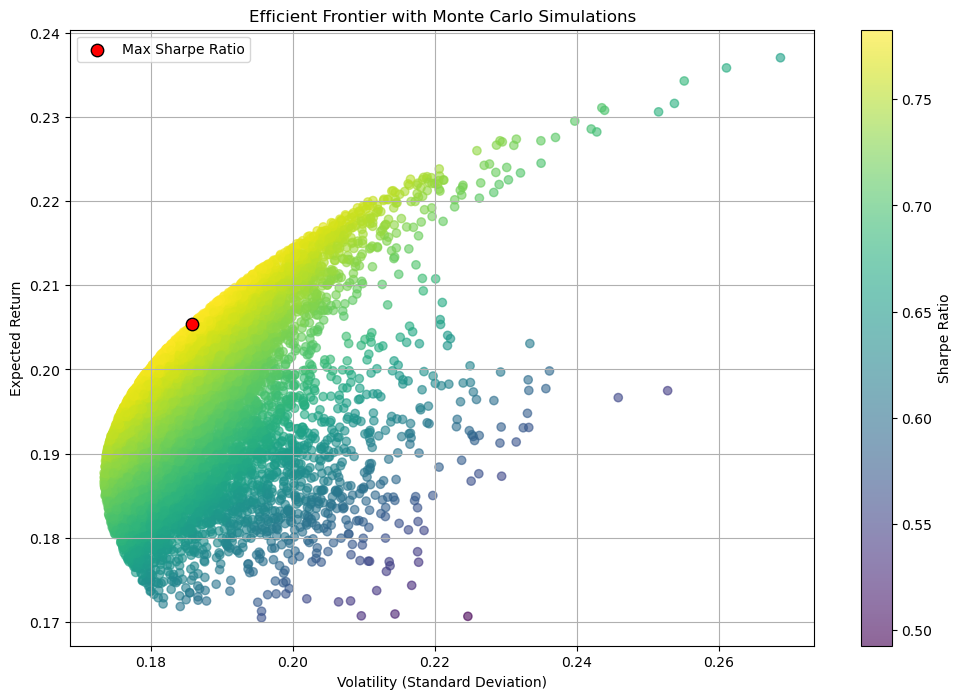

In [16]:
import matplotlib.pyplot as plt

# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_index = sharpe_runs.argmax()

# Plot all simulations
plt.figure(figsize=(12, 8))
plt.scatter(volatility_runs, return_runs, c=sharpe_runs, cmap='viridis', alpha=0.6)
plt.colorbar(label='Sharpe Ratio')

# Highlight the maximum Sharpe ratio portfolio
plt.scatter(volatility_runs[max_sharpe_index], return_runs[max_sharpe_index], c='red', s=80, edgecolors='black', label='Max Sharpe Ratio')

plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Monte Carlo Simulations')
plt.legend()
plt.grid(True)
plt.show()